# Mini-Project: Analyzing Global Air Quality and Health Data
Objective: To explore the relationship between air quality and public health across different countries.

Data sets: 

Air quality e.g., World Air Quality Index (AQI)

Health records e.g., from WHO


* Retrieve the data
* Clean the data
* Integrate the data
* Perform exploratory data analysis (EDA) to understand trends and patterns.
* Investigate correlations between air quality indices and health indicators.
* Summarize key insights and trends observed from the integrated dataset.


# Our Analysis and Findings from the data

Our analysis investigates Air Quality Index (AQI) and various health indicators of a population.

We choose the following population health indicators for comparison

* Life Expectancy
* Child Mortality
* Maternal Mortality Ratio

Air Quality Index (AQI) is a composite measure for level of air polution, with higher AQI value corresponding to higher polution levels. It is an indicator developed to communicate to how polluted the air is. As air pollution levels rise, so does the AQI.

**Table 1: Air Quality Index (AQI) Scale**

| AQI Value     	| Levels of Concern	 |
|-------------------|--------------------|
| 0 to 50	        | Good	             |
| 51 to 100	        | Moderate	         |
| 101 to 150        | Unhealthy for Sensitive Groups	    |
| 151 to 200	    | Unhealthy	         |


From our analysis of the dataset we found following correlation in Table 2 below:

**Table 2: Correlation Between AQI and Health Indicators**

| Indicator     	| Correlation Coefficient	 | p-value  |
|-------------------|:--------------------------:|:--------:|
| Life Expectancy	| -0.28	                     | 0.002    |
| Child Mortality   | 0.27	                     | 0.002    |
| Maternal Mortality Ratio  | 0.20 	             | 0.031    |


* a negative correlation between Air Quality Index (AQI) and Life Expectancy.
* a positive correlation between AQI and Child Mortality.
* a positive correlation between AQI and Maternal Mortality Ratio.

This indicates a statistically significant correlation between polution values with lower life expectancy, higher child mortality and maternal mortality rate.


The following scripts are a step by step walkthrough of our analysis:

## Execution

### Import Air Quality Data Set

In [71]:
import pandas as pd
import numpy as np

# Import Air Quality Index Data
aqi_data = pd.read_csv('input/AQI_Data.csv')
aqi_data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


### Import Population Data Set

In [72]:
# Import Country Data which includes life expectancy, infant mortality and maternal mortality health indicators
country_data = pd.read_csv('input/world-data-2023.csv')
country_data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


### Extract Health Data from Population Dataset

In [73]:
# Clean up the country data to only include the columns we want
health_data = country_data[['Country', 'Life expectancy', 'Maternal mortality ratio', 'Infant mortality']]
health_data.head()

,Country,Life expectancy,Maternal mortality ratio,Infant mortality
0,Afghanistan,64.5,638.0,47.9
1,Albania,78.5,15.0,7.8
2,Algeria,76.7,112.0,20.1
3,Andorra,NaN,NaN,2.7
4,Angola,60.8,241.0,51.6


### Aggregate Air Quality Data as average over given period of time

In [74]:
# Average AQI for each country by year
aqi_data_grouped = aqi_data.groupby('Country')['AQI Value'].mean().round(1)
aqi_data_grouped.head()

Country
Albania       26.2
Algeria       61.9
Andorra       31.2
Angola       109.5
Argentina     35.9
Name: AQI Value, dtype: float64

### Integrate Air Quality and Health Data

In [75]:
# Intergrate Air Quality Index data with Health data
merged_data = pd.merge(health_data, aqi_data_grouped, on='Country').dropna()
merged_data.head()

,Country,Life expectancy,Maternal mortality ratio,Infant mortality,AQI Value
0,Albania,78.5,15.0,7.8,26.2
1,Algeria,76.7,112.0,20.1,61.9
3,Angola,60.8,241.0,51.6,109.5
4,Argentina,76.5,39.0,8.8,35.9
5,Armenia,74.9,26.0,11.0,54.9


In [76]:
# Perform EDA
merged_data.describe()

,Life expectancy,Maternal mortality ratio,Infant mortality,AQI Value
count,116.000000,116.000000,116.000000,116.000000
mean,74.235345,103.129310,16.394828,67.723276
std,6.853565,188.362303,17.253324,37.848134
min,52.800000,2.000000,1.400000,11.600000
25%,71.175000,8.000000,3.675000,36.175000
50%,75.350000,26.000000,8.950000,62.250000
75%,79.250000,113.750000,22.500000,84.175000
max,84.200000,1140.000000,84.500000,184.500000


In [77]:
# Save integrated dataset as output
merged_data.to_csv('output/merged_health_aqi_data.csv')

### Plot data for visualization

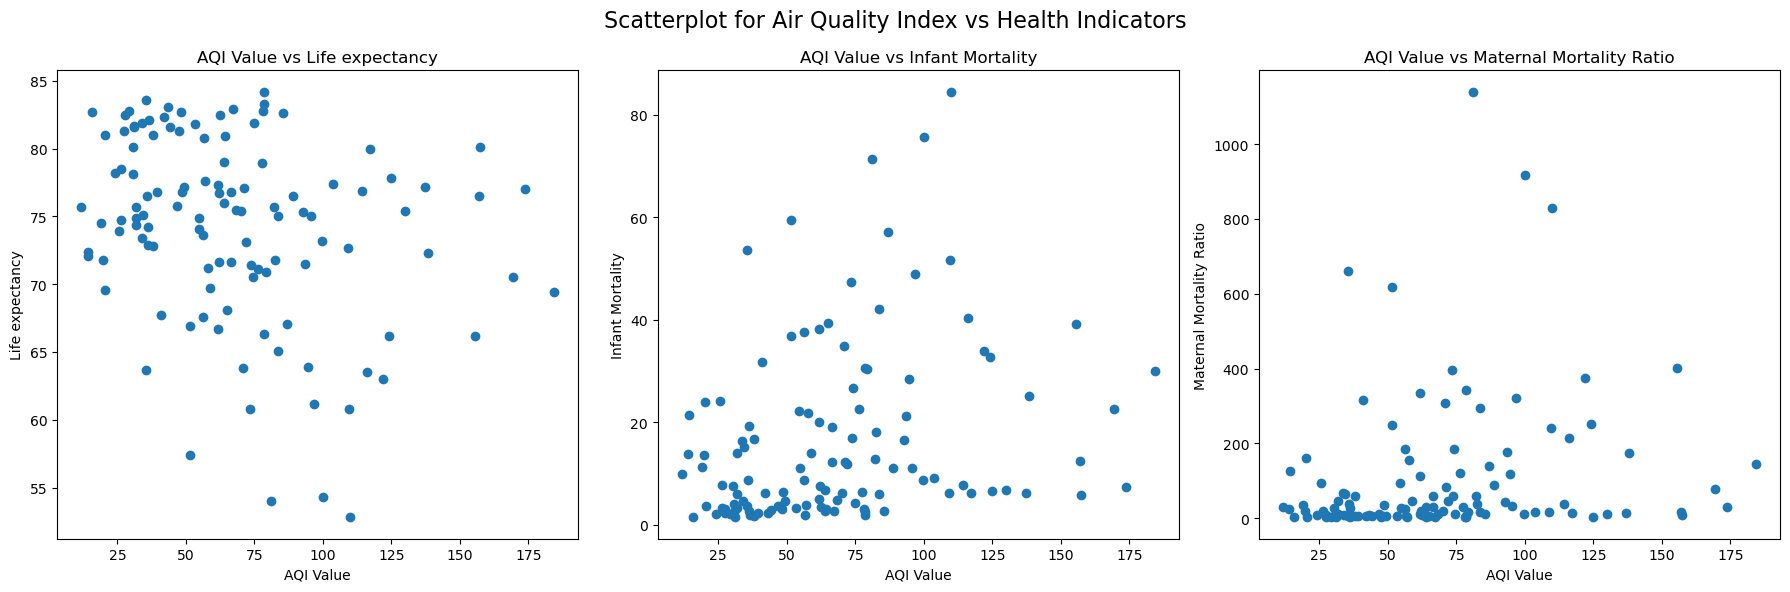

In [78]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot for AQI Value vs Life expectancy, Infant Mortality and Maternal Mortality Ratio
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for AQI Value vs Life expectancy
axs[0].scatter(merged_data['AQI Value'], merged_data['Life expectancy'])
axs[0].set_xlabel('AQI Value')
axs[0].set_ylabel('Life expectancy')
axs[0].set_title('AQI Value vs Life expectancy')

# Plot for AQI Value vs Infant Mortality
axs[1].scatter(merged_data['AQI Value'], merged_data['Infant mortality'])
axs[1].set_xlabel('AQI Value')
axs[1].set_ylabel('Infant Mortality')
axs[1].set_title('AQI Value vs Infant Mortality')

# Plot for AQI Value vs Maternal Mortality Ratio
axs[2].scatter(merged_data['AQI Value'], merged_data['Maternal mortality ratio'])
axs[2].set_xlabel('AQI Value')
axs[2].set_ylabel('Maternal Mortality Ratio')
axs[2].set_title('AQI Value vs Maternal Mortality Ratio')

# Set overall imag etitle
fig.suptitle('Scatterplot for Air Quality Index vs Health Indicators', fontsize=16)

plt.tight_layout()
plt.show()

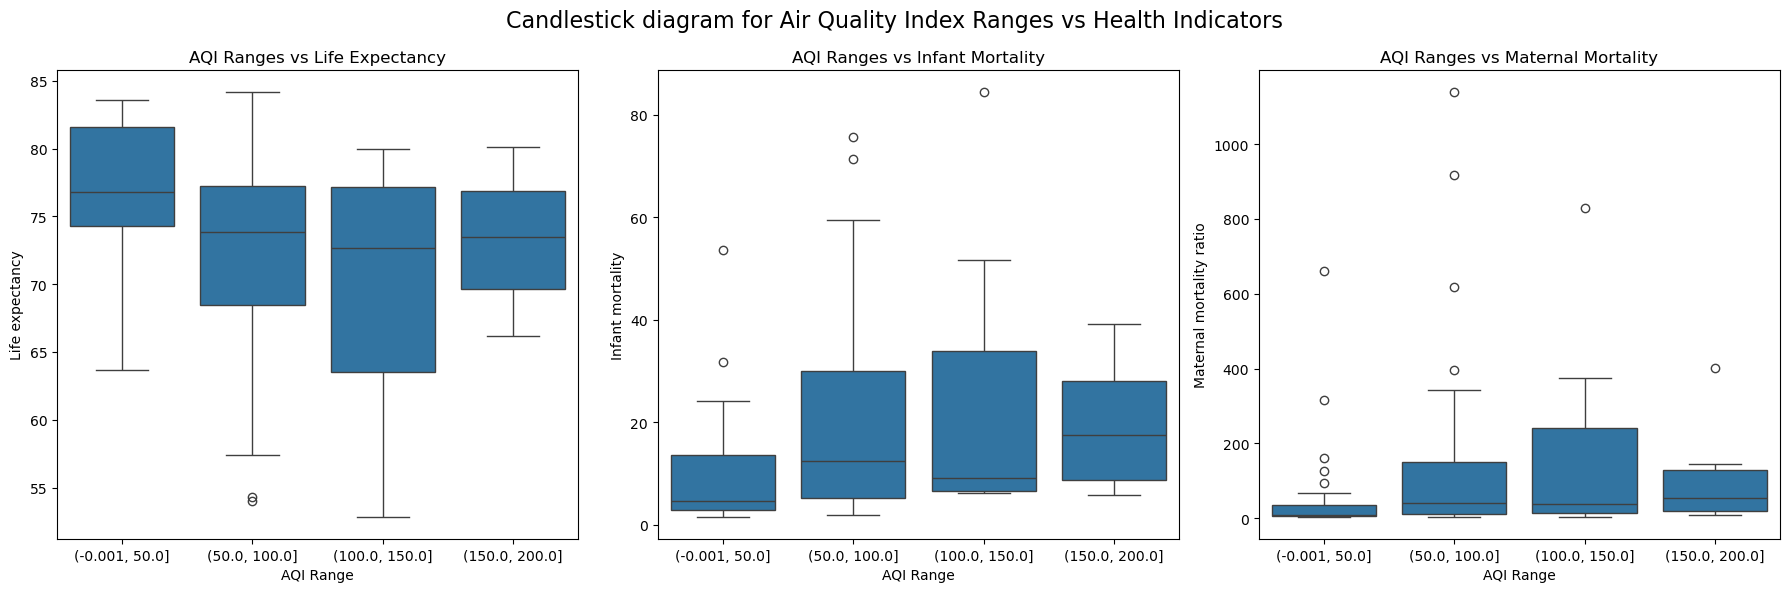

In [79]:
# Plot Candlestick chart for AQI Value
# Create bins 0-50,50-100,100-150,150-200 for AQI Ranges
# Define AQI ranges
bins = [0, 50, 100, 150, 200]

# Create a new column 'AQI Range' in the dataframe
merged_data['AQI Range'] = pd.cut(merged_data['AQI Value'], bins, include_lowest=True)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create a boxplot for Life expectancy
sns.boxplot(x='AQI Range', y='Life expectancy', data=merged_data, ax=axs[0])
axs[0].set_title('AQI Ranges vs Life Expectancy')

# Create a boxplot for Infant Mortality
sns.boxplot(x='AQI Range', y='Infant mortality', data=merged_data, ax=axs[1])
axs[1].set_title('AQI Ranges vs Infant Mortality')

# Create a boxplot for Maternal Mortality
sns.boxplot(x='AQI Range', y='Maternal mortality ratio', data=merged_data, ax=axs[2])
axs[2].set_title('AQI Ranges vs Maternal Mortality')

# Set overall chart title
fig.suptitle('Candlestick diagram for Air Quality Index Ranges vs Health Indicators', fontsize=16)

plt.tight_layout()
plt.show()

#### Investigate the correlation between AQI and Life expectancy

In [80]:
# Investigate the correlation btn AQI and Life expectancy
from scipy.stats import pearsonr

presultLifeExpectancy = pearsonr(merged_data['AQI Value'], merged_data['Life expectancy'])
print(f'AQI Value v/s Life Expectancy ===> correlation coefficient of {presultLifeExpectancy.statistic:.2f} and p-value of {presultLifeExpectancy.pvalue:.3f}')

presultInfantMortality = pearsonr(merged_data['AQI Value'], merged_data['Infant mortality'])
print(f'AQI Value v/s Infant Mortality ===> correlation coefficient of {presultInfantMortality.statistic:.2f} and p-value of {presultInfantMortality.pvalue:.3f}')

presultMaternalMortality = pearsonr(merged_data['AQI Value'], merged_data['Maternal mortality ratio'])
print(f'AQI Value v/s Maternal Mortality Ratio ===> correlation coefficient of {presultMaternalMortality.statistic:.2f} and p-value of {presultMaternalMortality.pvalue:.3f}')


AQI Value v/s Life Expectancy ===> correlation coefficient of -0.28 and p-value of 0.002
AQI Value v/s Infant Mortality ===> correlation coefficient of 0.27 and p-value of 0.003
AQI Value v/s Maternal Mortality Ratio ===> correlation coefficient of 0.20 and p-value of 0.031


# Summarize key insights and trends in the data

1. There is a strong negative correlation between AQI and Life expectancy

2. There is a strong positive correlation between AQI and Infant mortality

3. AQI is a good indicator of the health of a country

4. AQI is a good indicator of the life expectancy of a country

5. AQI is a good indicator of the infant mortality of a country

6. AQI is a good indicator of the maternal mortality of a country